# EDA-Project 1

Это ваш первый проект из второго блока курса Data Science. 
Вам предоставляется следующий файл: ```"foreign_exchange_rates.csv"```.

Сделайте EDA по данным. 
Перечислите вопросы, которые вы считаете важными. Затем попробуйте ответить на каждый вопрос, с подде, визуализации. Пожалуйста, сделайте ваш код чистым, а аргументы понятными.


Я хочу найти самую стабильную валюту к доллару США среди стран Азии, Европы, Северной-Южной Америки, Африки и стран Океании

In [1]:
import os
from datetime import datetime
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
csv_files = [f for f in os.listdir() if f.endswith("csv")]
csv_files

['foreign_exchange_rates.csv']

# Подготовка данных

In [3]:
rates = pd.read_csv("foreign_exchange_rates.csv")
rates.shape

(5217, 24)

In [4]:
rates

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


Если посмотреть в данные можно наити неизвестное значение "ND". Я буду заменять их на np.nan чтобы удалить в будущем
с помощью DataFrame.dropna()
А также я хочу заменить непонятные элементы из столбцов на более понятным

In [5]:
rates.columns = rates.columns.str.strip()
rates.columns = rates.columns.str.replace("/US\$","_USD")
rates.rename(columns={'Time Serie':"DATE"},inplace=True)
rates.drop(columns="Unnamed: 0", inplace=True)
rates.replace("ND", np.nan, inplace=True)

In [6]:
rates.isnull().sum()

DATE                                           0
AUSTRALIA - AUSTRALIAN DOLLAR_USD            198
EURO AREA - EURO_USD                         198
NEW ZEALAND - NEW ZELAND DOLLAR_USD          198
UNITED KINGDOM - UNITED KINGDOM POUND_USD    198
BRAZIL - REAL_USD                            198
CANADA - CANADIAN DOLLAR_USD                 198
CHINA - YUAN_USD                             197
HONG KONG - HONG KONG DOLLAR_USD             198
INDIA - INDIAN RUPEE_USD                     199
KOREA - WON_USD                              198
MEXICO - MEXICAN PESO_USD                    198
SOUTH AFRICA - RAND_USD                      198
SINGAPORE - SINGAPORE DOLLAR_USD             198
DENMARK - DANISH KRONE_USD                   198
JAPAN - YEN_USD                              198
MALAYSIA - RINGGIT_USD                       198
NORWAY - NORWEGIAN KRONE_USD                 198
SWEDEN - KRONA_USD                           198
SRI LANKA - SRI LANKAN RUPEE_USD             198
SWITZERLAND - FRANC_

In [7]:
rates.dropna(inplace=True)

In [8]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5015 entries, 0 to 5216
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   DATE                                       5015 non-null   object
 1   AUSTRALIA - AUSTRALIAN DOLLAR_USD          5015 non-null   object
 2   EURO AREA - EURO_USD                       5015 non-null   object
 3   NEW ZEALAND - NEW ZELAND DOLLAR_USD        5015 non-null   object
 4   UNITED KINGDOM - UNITED KINGDOM POUND_USD  5015 non-null   object
 5   BRAZIL - REAL_USD                          5015 non-null   object
 6   CANADA - CANADIAN DOLLAR_USD               5015 non-null   object
 7   CHINA - YUAN_USD                           5015 non-null   object
 8   HONG KONG - HONG KONG DOLLAR_USD           5015 non-null   object
 9   INDIA - INDIAN RUPEE_USD                   5015 non-null   object
 10  KOREA - WON_USD                     

In [9]:
rates = rates.copy()
for column in rates.columns.tolist():
    if column != "DATE":
        rates[column] = pd.to_numeric(rates[column])
    elif column == "DATE":
        rates["YEAR"] = rates["DATE"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").year)
        rates["MONTH"] = rates["DATE"].apply(lambda x: datetime.strftime(datetime.strptime(x, "%Y-%m-%d"),"%B")) 
        rates["DAY"] = rates["DATE"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").day)
        rates["WEEKDAY"] = rates["DATE"].apply(lambda x: datetime.strftime(datetime.strptime(x,"%Y-%m-%d"),"%A"))
        rates[column] = rates[column].astype("datetime64")

In [10]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5015 entries, 0 to 5216
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   DATE                                       5015 non-null   datetime64[ns]
 1   AUSTRALIA - AUSTRALIAN DOLLAR_USD          5015 non-null   float64       
 2   EURO AREA - EURO_USD                       5015 non-null   float64       
 3   NEW ZEALAND - NEW ZELAND DOLLAR_USD        5015 non-null   float64       
 4   UNITED KINGDOM - UNITED KINGDOM POUND_USD  5015 non-null   float64       
 5   BRAZIL - REAL_USD                          5015 non-null   float64       
 6   CANADA - CANADIAN DOLLAR_USD               5015 non-null   float64       
 7   CHINA - YUAN_USD                           5015 non-null   float64       
 8   HONG KONG - HONG KONG DOLLAR_USD           5015 non-null   float64       
 9   INDIA - INDIAN RUPE

In [11]:
rates.head()

,DATE,AUSTRALIA - AUSTRALIAN DOLLAR_USD,EURO AREA - EURO_USD,NEW ZEALAND - NEW ZELAND DOLLAR_USD,UNITED KINGDOM - UNITED KINGDOM POUND_USD,BRAZIL - REAL_USD,CANADA - CANADIAN DOLLAR_USD,CHINA - YUAN_USD,HONG KONG - HONG KONG DOLLAR_USD,INDIA - INDIAN RUPEE_USD,...,NORWAY - NORWEGIAN KRONE_USD,SWEDEN - KRONA_USD,SRI LANKA - SRI LANKAN RUPEE_USD,SWITZERLAND - FRANC_USD,TAIWAN - NEW TAIWAN DOLLAR_USD,THAILAND - BAHT_USD,YEAR,MONTH,DAY,WEEKDAY
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,7.964,8.4430,72.30,1.5808,31.38,36.97,2000,January,3,Monday
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,7.934,8.3600,72.65,1.5565,30.60,37.13,2000,January,4,Tuesday
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,7.935,8.3530,72.95,1.5526,30.80,37.10,2000,January,5,Wednesday
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,7.940,8.3675,72.95,1.5540,31.75,37.62,2000,January,6,Thursday
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,7.966,8.4150,73.15,1.5623,30.85,37.30,2000,January,7,Friday


In [12]:
rates.columns

Index(['DATE', 'AUSTRALIA - AUSTRALIAN DOLLAR_USD', 'EURO AREA - EURO_USD',
       'NEW ZEALAND - NEW ZELAND DOLLAR_USD',
       'UNITED KINGDOM - UNITED KINGDOM POUND_USD', 'BRAZIL - REAL_USD',
       'CANADA - CANADIAN DOLLAR_USD', 'CHINA - YUAN_USD',
       'HONG KONG - HONG KONG DOLLAR_USD', 'INDIA - INDIAN RUPEE_USD',
       'KOREA - WON_USD', 'MEXICO - MEXICAN PESO_USD',
       'SOUTH AFRICA - RAND_USD', 'SINGAPORE - SINGAPORE DOLLAR_USD',
       'DENMARK - DANISH KRONE_USD', 'JAPAN - YEN_USD',
       'MALAYSIA - RINGGIT_USD', 'NORWAY - NORWEGIAN KRONE_USD',
       'SWEDEN - KRONA_USD', 'SRI LANKA - SRI LANKAN RUPEE_USD',
       'SWITZERLAND - FRANC_USD', 'TAIWAN - NEW TAIWAN DOLLAR_USD',
       'THAILAND - BAHT_USD', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'],
      dtype='object')

Здесь разделил страны по континентам Европеискии союз брать не буду так как он не является отдельным государством 

In [13]:
europa = rates[["DATE","UNITED KINGDOM - UNITED KINGDOM POUND_USD",
                     "NORWAY - NORWEGIAN KRONE_USD", "SWEDEN - KRONA_USD","SWITZERLAND - FRANC_USD",
                     "DENMARK - DANISH KRONE_USD", "YEAR","MONTH","DAY","WEEKDAY"]]
north_america = rates[["DATE","CANADA - CANADIAN DOLLAR_USD","MEXICO - MEXICAN PESO_USD","YEAR","MONTH","DAY","WEEKDAY"]]
south_america = rates[["DATE",'YEAR', 'MONTH', 'DAY', 'WEEKDAY',"BRAZIL - REAL_USD", ]]
oceania = rates[["DATE", 'AUSTRALIA - AUSTRALIAN DOLLAR_USD', 'NEW ZEALAND - NEW ZELAND DOLLAR_USD',"YEAR","MONTH","DAY","WEEKDAY"]]
asia = rates[["DATE", 'CHINA - YUAN_USD','HONG KONG - HONG KONG DOLLAR_USD', 
                      'INDIA - INDIAN RUPEE_USD','KOREA - WON_USD', 'SINGAPORE - SINGAPORE DOLLAR_USD',
                     'JAPAN - YEN_USD', 'MALAYSIA - RINGGIT_USD', 'SRI LANKA - SRI LANKAN RUPEE_USD',
                     'TAIWAN - NEW TAIWAN DOLLAR_USD', 'THAILAND - BAHT_USD', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY']]
africa = rates[["DATE",'SOUTH AFRICA - RAND_USD', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY']]

# Исследование данных стран Европы

In [14]:
europa

,DATE,UNITED KINGDOM - UNITED KINGDOM POUND_USD,NORWAY - NORWEGIAN KRONE_USD,SWEDEN - KRONA_USD,SWITZERLAND - FRANC_USD,DENMARK - DANISH KRONE_USD,YEAR,MONTH,DAY,WEEKDAY
0,2000-01-03,0.6146,7.9640,8.4430,1.5808,7.3290,2000,January,3,Monday
1,2000-01-04,0.6109,7.9340,8.3600,1.5565,7.2180,2000,January,4,Tuesday
2,2000-01-05,0.6092,7.9350,8.3530,1.5526,7.2080,2000,January,5,Wednesday
3,2000-01-06,0.6070,7.9400,8.3675,1.5540,7.2125,2000,January,6,Thursday
4,2000-01-07,0.6104,7.9660,8.4150,1.5623,7.2285,2000,January,7,Friday
...,...,...,...,...,...,...,...,...,...,...
5211,2019-12-24,0.7719,8.9142,9.4133,0.9807,6.7399,2019,December,24,Tuesday
5213,2019-12-26,0.7688,8.8799,9.4108,0.9808,6.7295,2019,December,26,Thursday
5214,2019-12-27,0.7639,8.8291,9.3405,0.9741,6.6829,2019,December,27,Friday
5215,2019-12-30,0.7610,8.7839,9.3145,0.9677,6.6589,2019,December,30,Monday


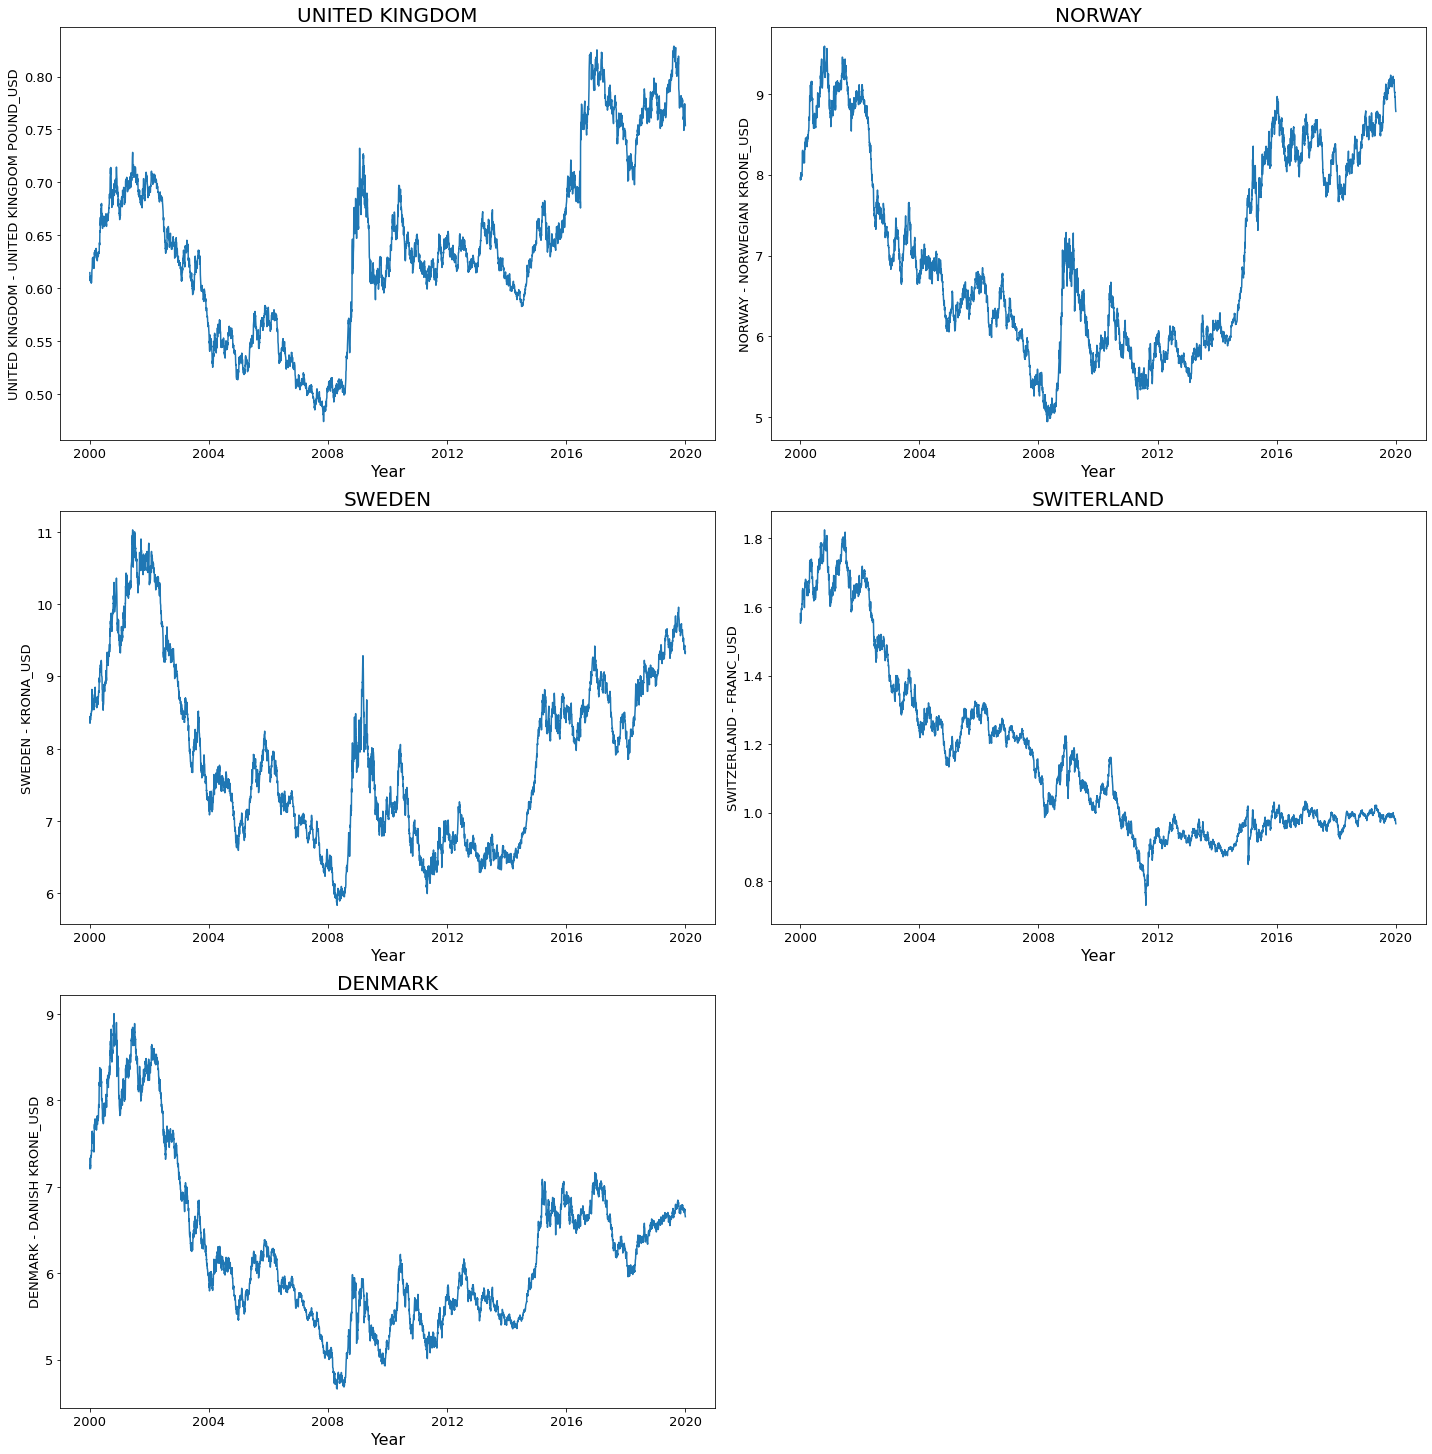

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
list_title = ["UNITED KINGDOM","NORWAY","SWEDEN","SWITERLAND","DENMARK"]
fig.delaxes(axs[2,1])
index = 0
for row in range(3):
    for col in range(2):
        index = index + 1
        if index <= 5:
            plt.tight_layout() 
            axs[row,col].plot(europa["DATE"],europa[europa.columns[index]]) 
            axs[row,col].set_title(list_title[index-1],fontsize=20)
            axs[row,col].set_xlabel("Year", fontsize=16)
            axs[row,col].set_ylabel(europa.columns[index], fontsize=13)
            axs[row,col].tick_params(axis='both', which='major', labelsize=13);

Национальная валюта стран Европы с 2000 до 2008 года только укрепляется но с 2008 года идет резко негативная высокая девальвация.
Причинои этому был  мировои экономическии кризис 2008 года. В период кризиса в Европе промышленное производство сократилось на 12%, ВВП на 0.2%.
Эти все факторы резко ударили по Национальной валюте стран Европы.
Спад экономики Еврозоны закончился во втором квартале 2009 года.

Манипулировать датафрейм "europa" не очень комфортно и дико неудобно!Я бы хотел использовать пакет seaborn чтобы
рисовать всю динамику национальных валют стран Европы, использую аргументы hue. Чтобы осуществить этот план мне нужно
использовать названия стран как строчку.В этом случае мне поможет pd.melt()

In [16]:
country = []
time = []
for column in europa.columns.tolist():
    if europa[column].dtype == float:
        country.append(column)
    else:
        time.append(column)
europa_melt = pd.melt(europa, id_vars=time, value_vars=country)        

In [20]:
europa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5015 entries, 0 to 5216
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   DATE                                       5015 non-null   datetime64[ns]
 1   UNITED KINGDOM - UNITED KINGDOM POUND_USD  5015 non-null   float64       
 2   NORWAY - NORWEGIAN KRONE_USD               5015 non-null   float64       
 3   SWEDEN - KRONA_USD                         5015 non-null   float64       
 4   SWITZERLAND - FRANC_USD                    5015 non-null   float64       
 5   DENMARK - DANISH KRONE_USD                 5015 non-null   float64       
 6   YEAR                                       5015 non-null   int64         
 7   MONTH                                      5015 non-null   object        
 8   DAY                                        5015 non-null   int64         
 9   WEEKDAY            

In [19]:
europa_melt

,DATE,YEAR,MONTH,DAY,WEEKDAY,variable,value
0,2000-01-03,2000,January,3,Monday,UNITED KINGDOM - UNITED KINGDOM POUND_USD,0.6146
1,2000-01-04,2000,January,4,Tuesday,UNITED KINGDOM - UNITED KINGDOM POUND_USD,0.6109
2,2000-01-05,2000,January,5,Wednesday,UNITED KINGDOM - UNITED KINGDOM POUND_USD,0.6092
3,2000-01-06,2000,January,6,Thursday,UNITED KINGDOM - UNITED KINGDOM POUND_USD,0.6070
4,2000-01-07,2000,January,7,Friday,UNITED KINGDOM - UNITED KINGDOM POUND_USD,0.6104
...,...,...,...,...,...,...,...
25070,2019-12-24,2019,December,24,Tuesday,DENMARK - DANISH KRONE_USD,6.7399
25071,2019-12-26,2019,December,26,Thursday,DENMARK - DANISH KRONE_USD,6.7295
25072,2019-12-27,2019,December,27,Friday,DENMARK - DANISH KRONE_USD,6.6829
25073,2019-12-30,2019,December,30,Monday,DENMARK - DANISH KRONE_USD,6.6589


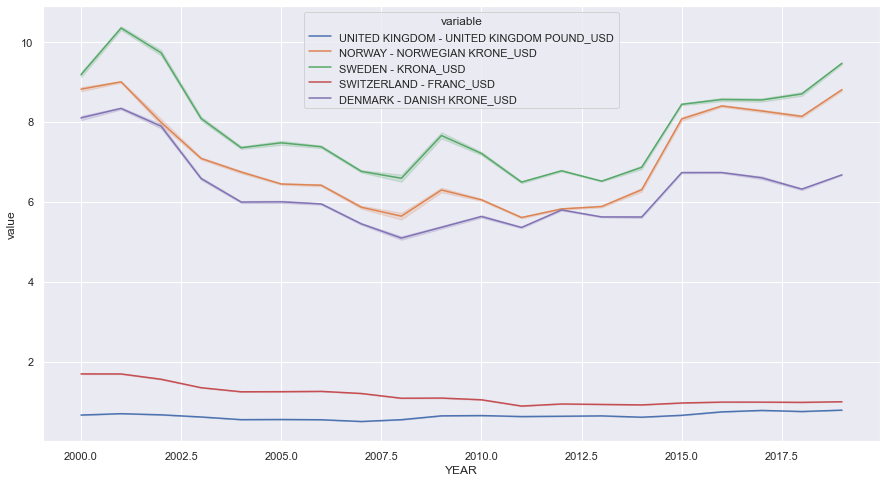

In [17]:
sns.set(rc = {'figure.figsize':(15,8)}, style="darkgrid", context="notebook")

sns.lineplot(x="YEAR",y="value" , hue="variable", data=europa_melt);

По графику видно что самая стабильная независимая валюта в отношении доллара это Швецарскии франк.

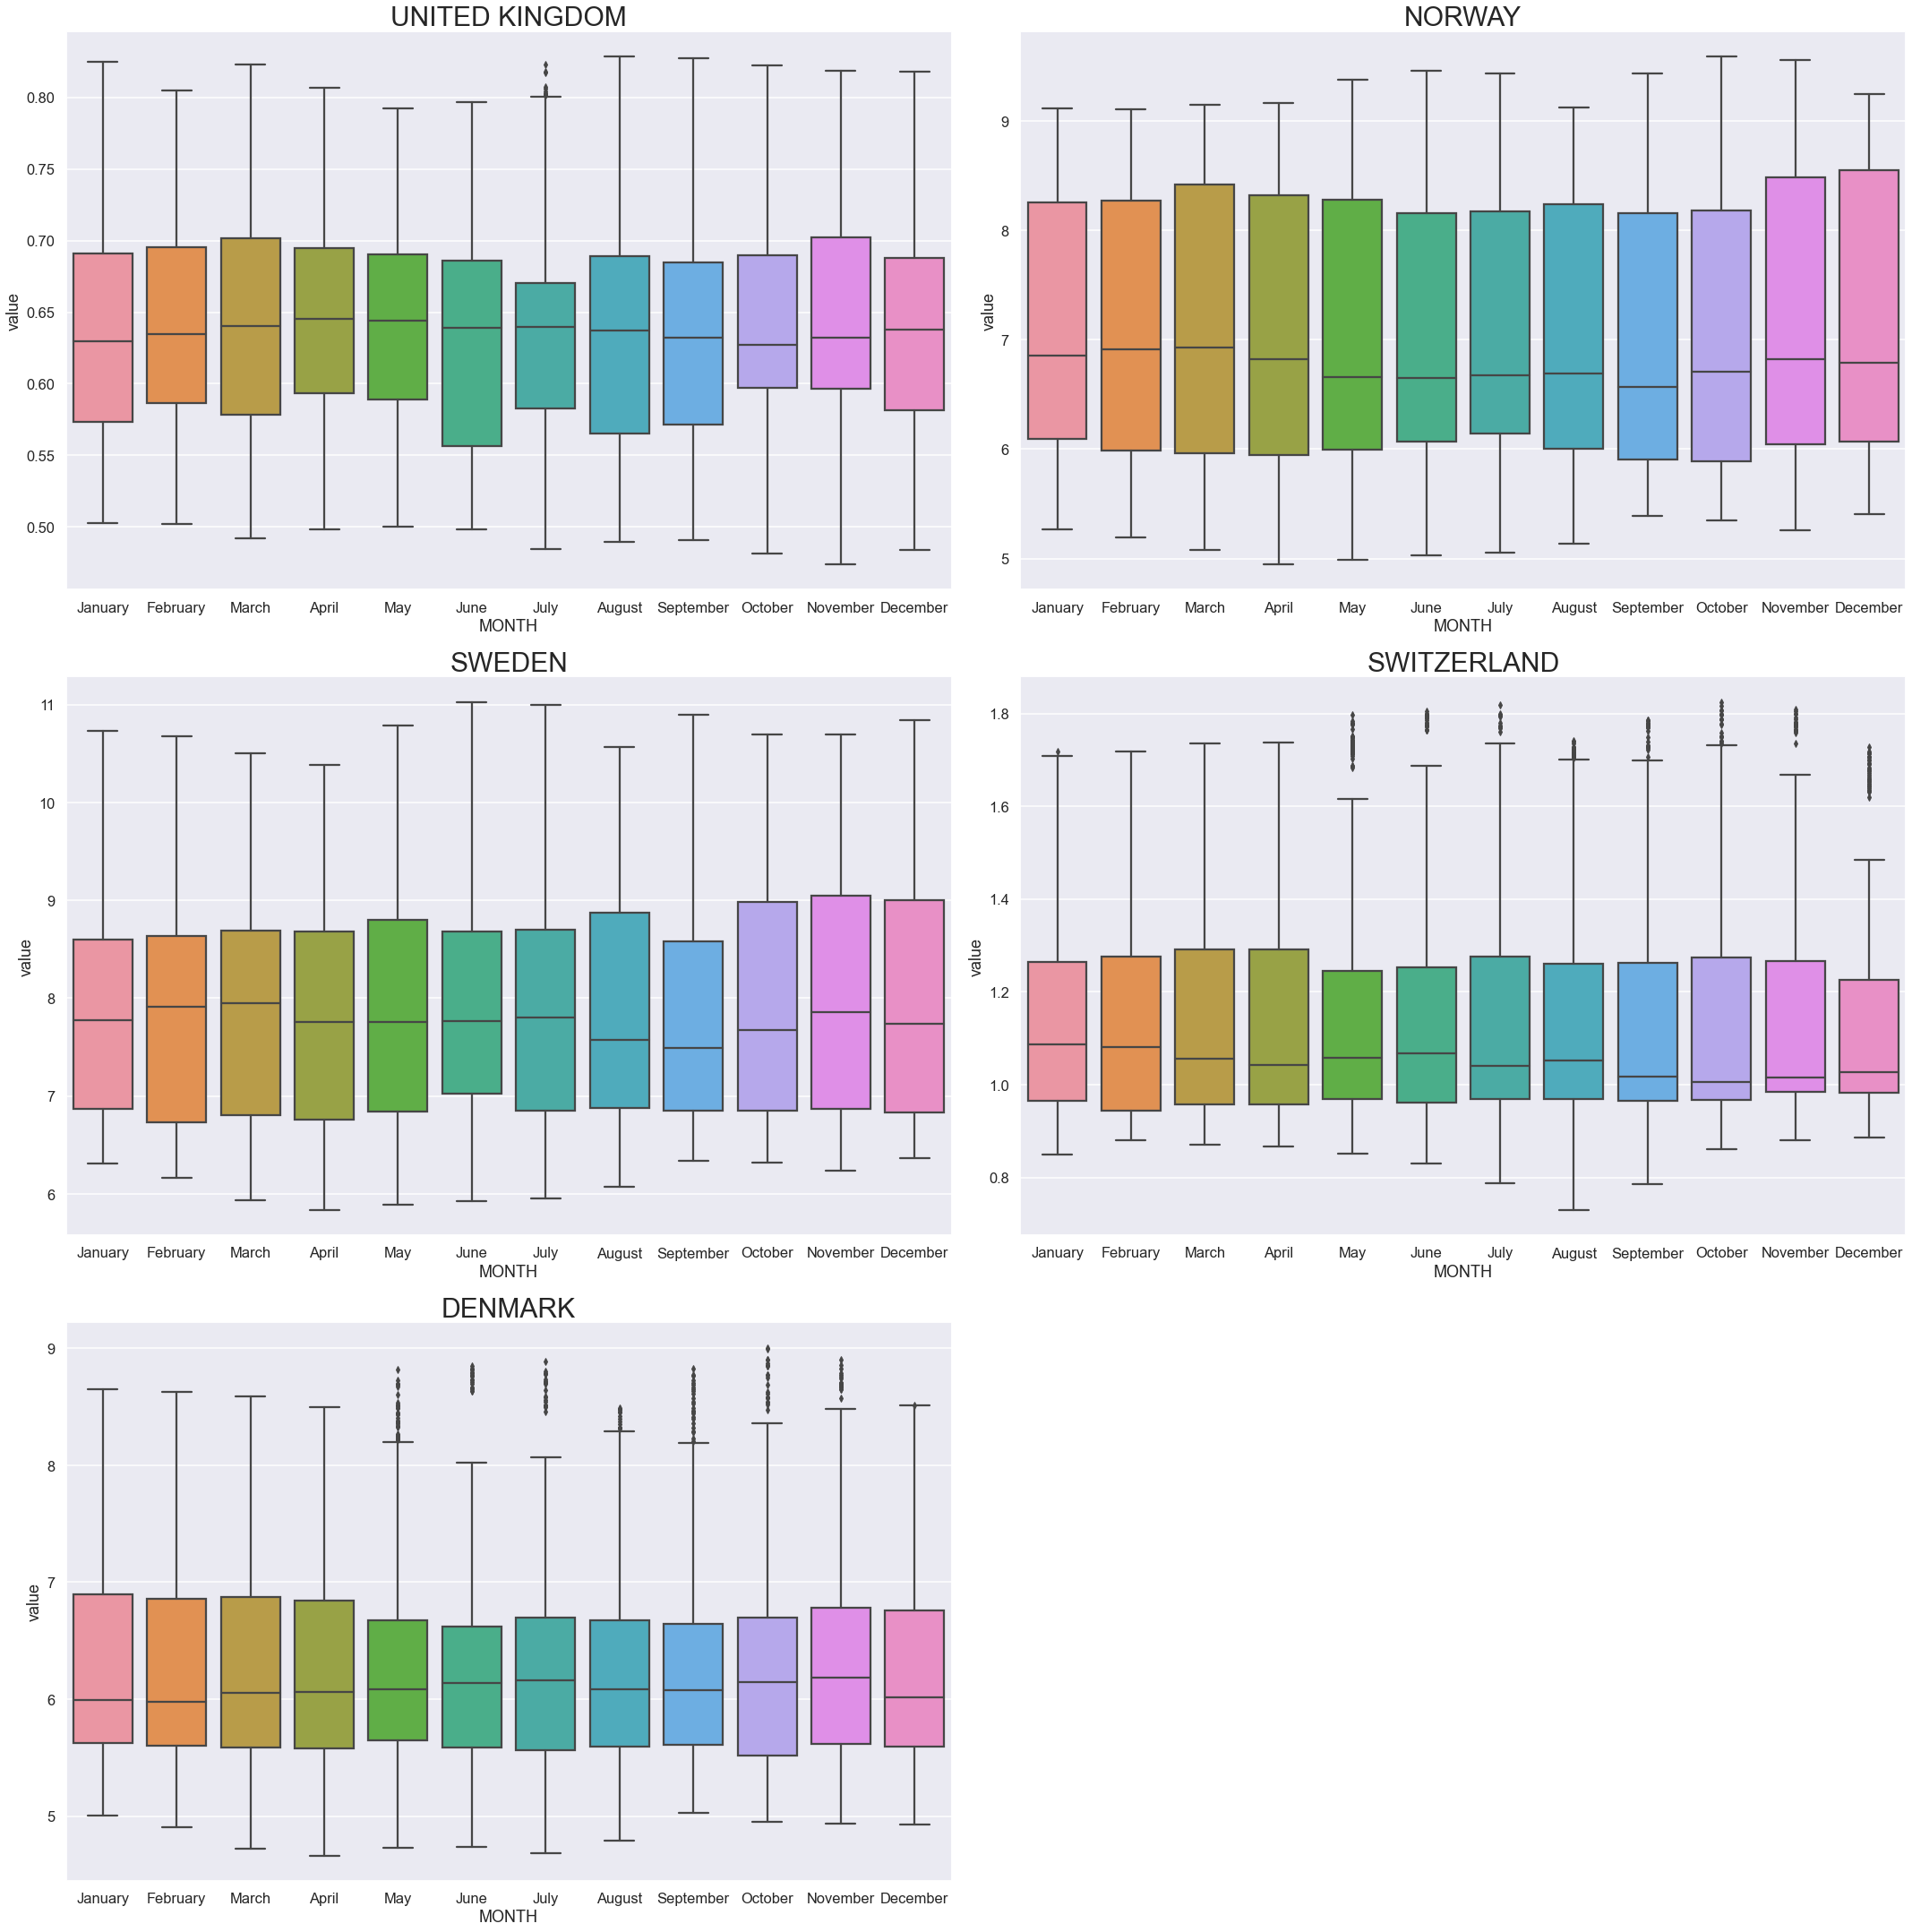

In [18]:
sns.set(style="darkgrid", context="talk")
axs = []
fig = plt.figure(figsize=(30,30))
axs.append(fig.add_subplot(3,2,1));
axs.append(fig.add_subplot(3,2,2));
axs.append(fig.add_subplot(3,2,3));
axs.append(fig.add_subplot(3,2,4));
axs.append(fig.add_subplot(3,2,5));
for count,ax in enumerate(axs,1):
    plt.tight_layout()
    if count == 1:
        europa_UK = europa_melt[europa_melt["variable"] == "UNITED KINGDOM - UNITED KINGDOM POUND_USD"]
        sns.boxplot(x="MONTH", y="value", data=europa_UK, ax=ax).set_title("UNITED KINGDOM",fontsize=30)
    elif count == 2:
        europa_Norway = europa_melt[europa_melt["variable"]=="NORWAY - NORWEGIAN KRONE_USD"]
        sns.boxplot(x="MONTH", y="value", data=europa_Norway, ax=ax).set_title("NORWAY", fontsize=30)
    elif count == 3:
        europa_Sweden = europa_melt[europa_melt["variable"]== "SWEDEN - KRONA_USD"]
        sns.boxplot(x="MONTH", y="value", data=europa_Sweden, ax=ax).set_title("SWEDEN",fontsize=30)
    elif count == 4:
        europa_Switzerland = europa_melt[europa_melt["variable"]=="SWITZERLAND - FRANC_USD"]
        sns.boxplot(x="MONTH", y="value", data=europa_Switzerland, ax=ax).set_title("SWITZERLAND",fontsize=30)
    else:
        europa_Denmark = europa_melt[europa_melt["variable"]=="DENMARK - DANISH KRONE_USD"]
        sns.boxplot(x="MONTH", y="value", data=europa_Denmark, ax=ax).set_title("DENMARK",fontsize=30)       

Здесь есть полная информация о валютах европеиских стран  по отношению к доллару в течении 20 лет по месячно

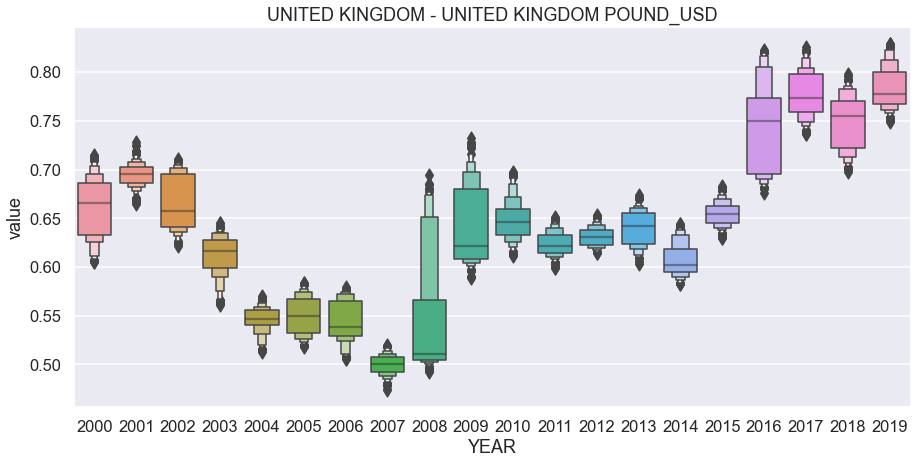

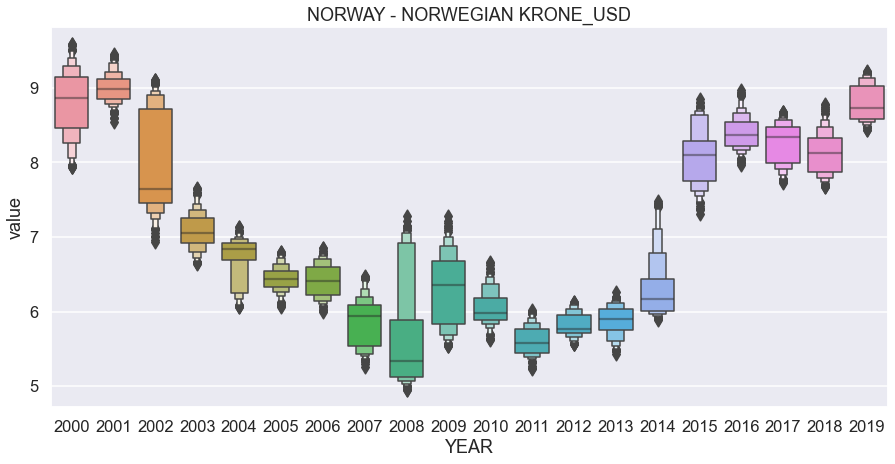

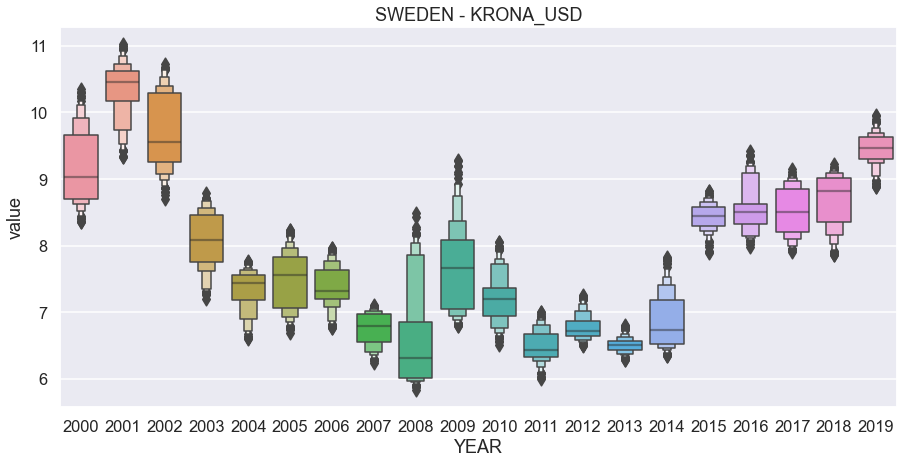

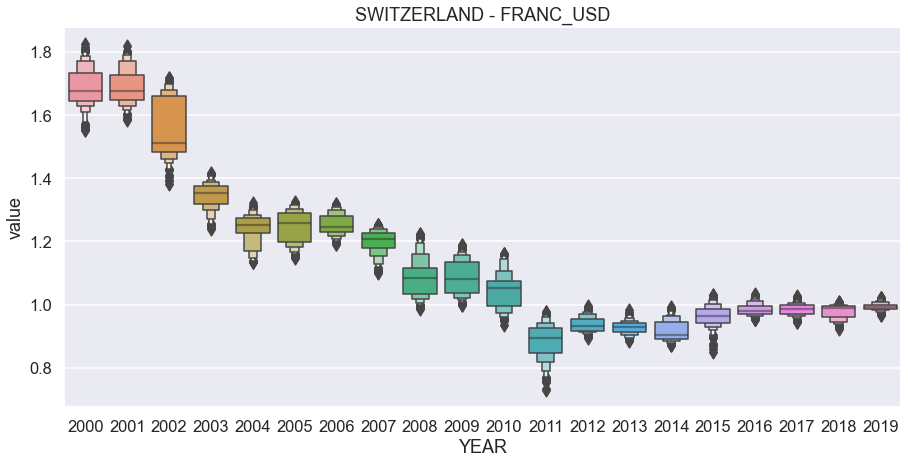

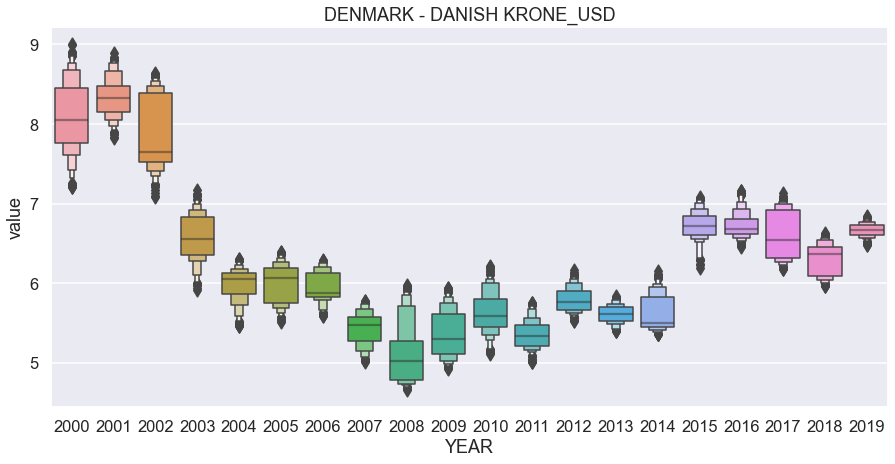

In [19]:
for column in europa.columns.tolist(): 
    if europa[column].dtype == float:
        plt.figure(figsize=(15,7))
        sns.boxenplot(x="YEAR", y="value", data=europa_melt[europa_melt["variable"] == column]).set_title(column)

По графику видно что максимальная ревальвация было в 2007-08 годах в отношении к доллара и в то же время было и резко негативная девальвация

# Исследование данных стран Азии

In [20]:
asia.head()

,DATE,CHINA - YUAN_USD,HONG KONG - HONG KONG DOLLAR_USD,INDIA - INDIAN RUPEE_USD,KOREA - WON_USD,SINGAPORE - SINGAPORE DOLLAR_USD,JAPAN - YEN_USD,MALAYSIA - RINGGIT_USD,SRI LANKA - SRI LANKAN RUPEE_USD,TAIWAN - NEW TAIWAN DOLLAR_USD,THAILAND - BAHT_USD,YEAR,MONTH,DAY,WEEKDAY
0,2000-01-03,8.2798,7.7765,43.55,1128.0,1.6563,101.70,3.8,72.30,31.38,36.97,2000,January,3,Monday
1,2000-01-04,8.2799,7.7775,43.55,1122.5,1.6535,103.09,3.8,72.65,30.60,37.13,2000,January,4,Tuesday
2,2000-01-05,8.2798,7.7780,43.55,1135.0,1.6560,103.77,3.8,72.95,30.80,37.10,2000,January,5,Wednesday
3,2000-01-06,8.2797,7.7785,43.55,1146.5,1.6655,105.19,3.8,72.95,31.75,37.62,2000,January,6,Thursday
4,2000-01-07,8.2794,7.7783,43.55,1138.0,1.6625,105.17,3.8,73.15,30.85,37.30,2000,January,7,Friday


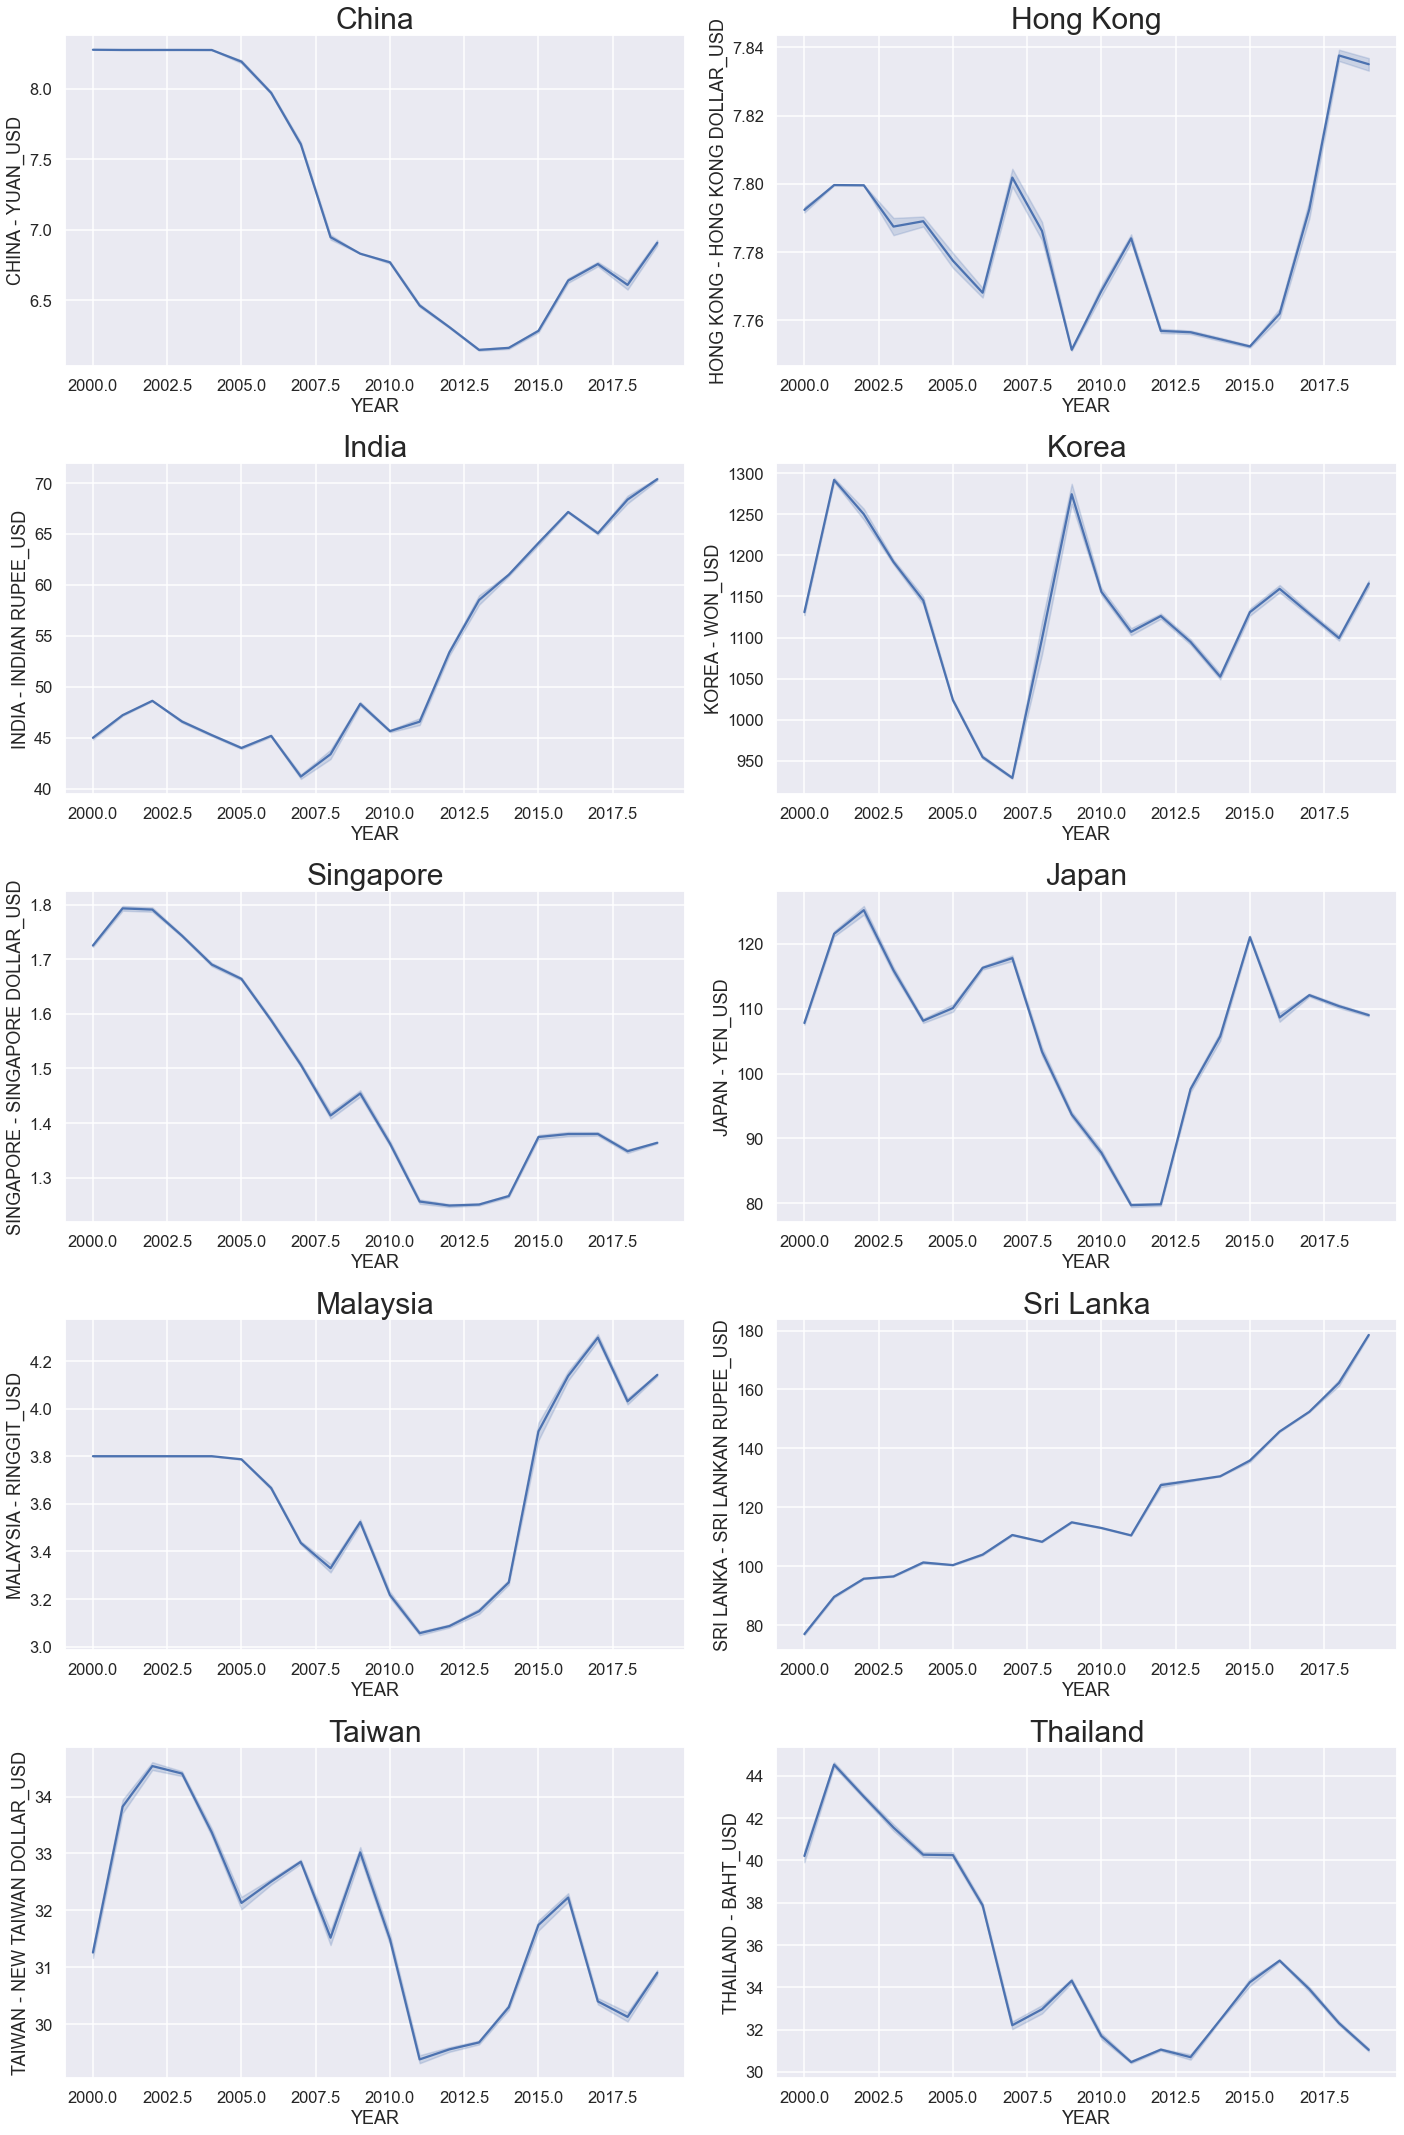

In [21]:
name_country_for_y = []
for column in asia.columns.tolist():
    if asia[column].dtype == float:
        name_country_for_y.append(column)
name_for_title = ["China","Hong Kong", "India", "Korea", "Singapore", "Japan","Malaysia", "Sri Lanka", "Taiwan","Thailand"]

axs = []
sns.set(style="darkgrid", context="talk")
fig = plt.figure(figsize=(20,30))
axs.append(fig.add_subplot(5,2,1))
axs.append(fig.add_subplot(5,2,2))
axs.append(fig.add_subplot(5,2,3))
axs.append(fig.add_subplot(5,2,4))
axs.append(fig.add_subplot(5,2,5))
axs.append(fig.add_subplot(5,2,6))
axs.append(fig.add_subplot(5,2,7))
axs.append(fig.add_subplot(5,2,8))
axs.append(fig.add_subplot(5,2,9))
axs.append(fig.add_subplot(5,2,10))
for idx,ax in enumerate(axs,0):
    plt.tight_layout()
    if idx == 0:
        sns.lineplot(x="YEAR", y=name_country_for_y[idx], data=asia, ax=ax).set_title(name_for_title[idx],fontsize=30)
    elif idx == 1:
        sns.lineplot(x="YEAR", y=name_country_for_y[idx], data=asia, ax=ax).set_title(name_for_title[idx],fontsize=30)
    elif idx == 2:
        sns.lineplot(x="YEAR", y=name_country_for_y[idx], data=asia, ax=ax).set_title(name_for_title[idx],fontsize=30)
    elif idx == 3:
        sns.lineplot(x="YEAR", y=name_country_for_y[idx], data=asia, ax=ax).set_title(name_for_title[idx],fontsize=30)
    elif idx == 4:
        sns.lineplot(x="YEAR", y=name_country_for_y[idx], data=asia, ax=ax).set_title(name_for_title[idx],fontsize=30)
    elif idx == 5:
        sns.lineplot(x="YEAR", y=name_country_for_y[idx], data=asia, ax=ax).set_title(name_for_title[idx],fontsize=30)
    elif idx == 6:
        sns.lineplot(x="YEAR", y=name_country_for_y[idx], data=asia, ax=ax).set_title(name_for_title[idx],fontsize=30)
    elif idx == 7:
        sns.lineplot(x="YEAR", y=name_country_for_y[idx], data=asia, ax=ax).set_title(name_for_title[idx],fontsize=30)
    elif idx == 8:
        sns.lineplot(x="YEAR", y=name_country_for_y[idx], data=asia, ax=ax).set_title(name_for_title[idx],fontsize=30)
    else:
        sns.lineplot(x="YEAR", y=name_country_for_y[idx], data=asia, ax=ax).set_title(name_for_title[idx],fontsize=30)

По графику видно, самая стабильная национальная валюта у Юго-Восточном-Азии.
Мировом кризис 2008 года не так сильно повлиял на стран Юго-Восточном-Азии в отличие от Европы,а Япония вообще не пострадала.
Самая хорошая динамика за 20 лет у Таиланда. 2000 годах Таиландскии бат к доллару был равен около 40 а 2019 году был равен 31.
За 20 лет Таиландскии бат укрепился на 22.5%.
По моим данным, стабильная и независимая национальная валюта это Таиландскии бат

In [22]:
country_asia = []
time_asia = []
for column in asia.columns.tolist():
    if asia[column].dtype == float:
        country_asia.append(column)
    else:
        time_asia.append(column)

In [23]:
asia_melt = pd.melt(asia, id_vars=time_asia, value_vars=country_asia)

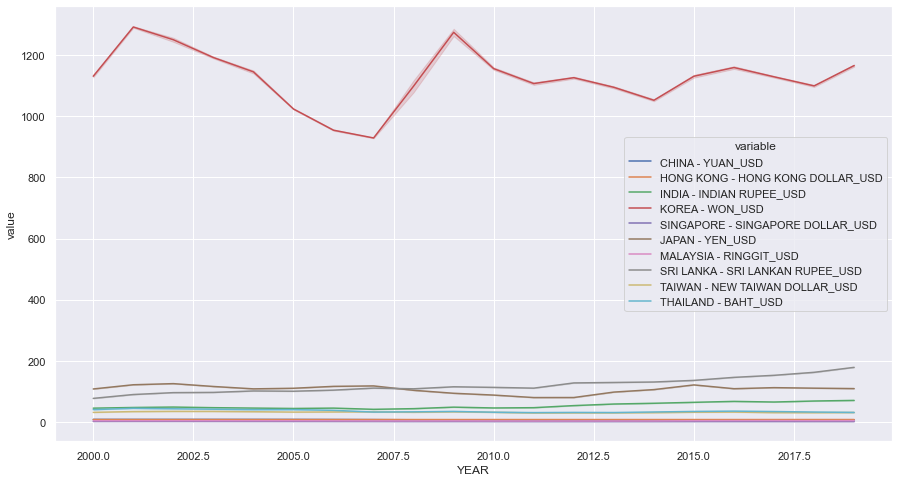

In [24]:
sns.set(rc = {'figure.figsize':(15,8)}, style="darkgrid", context="notebook")

sns.lineplot(x="YEAR",y="value" , hue="variable", data=asia_melt);

Неустоичивая национальная валюта у Индии и Шри-Ланки

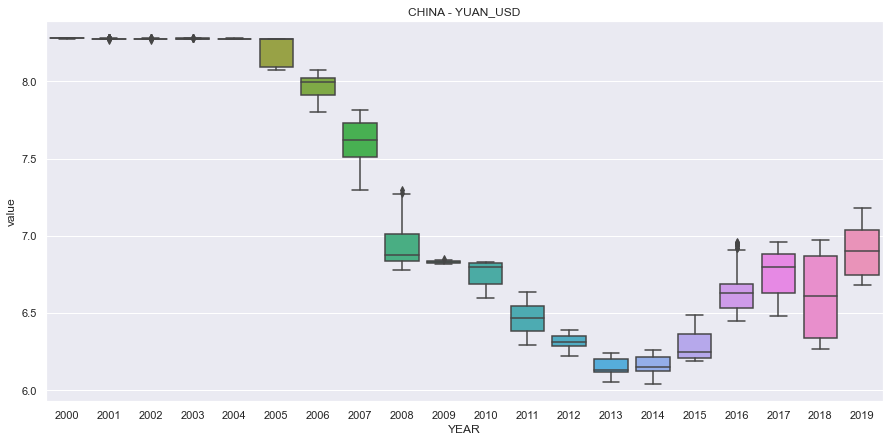

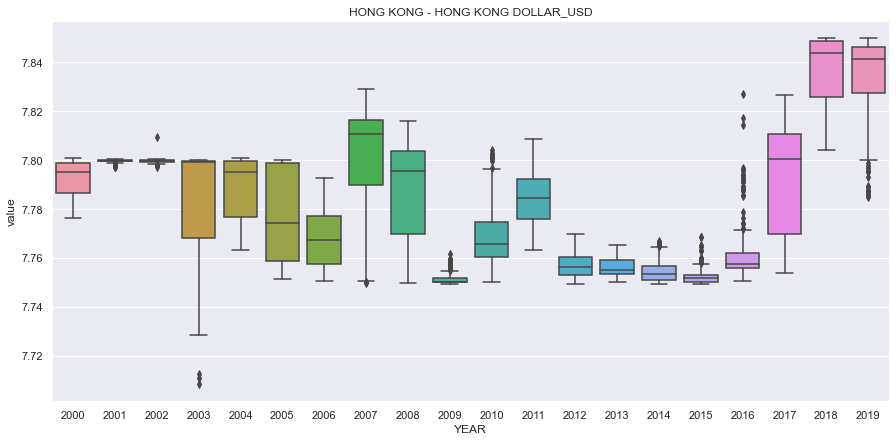

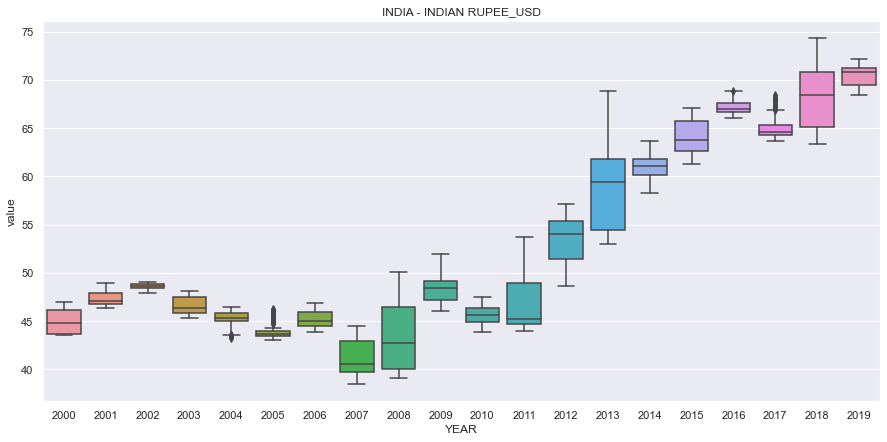

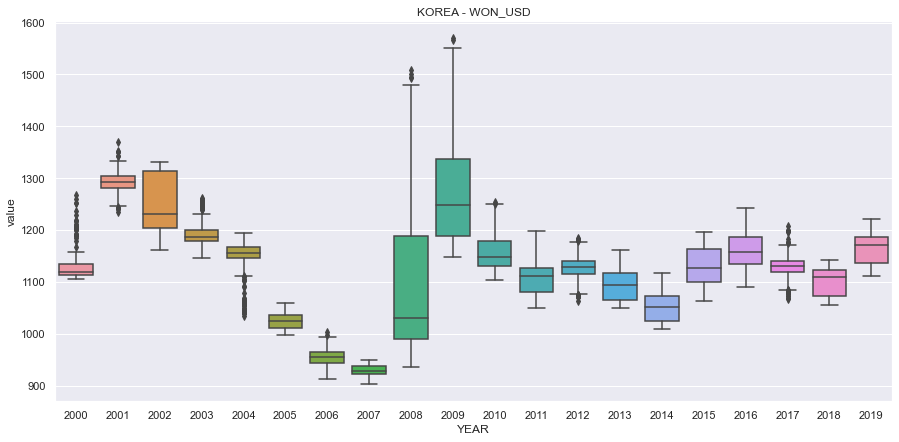

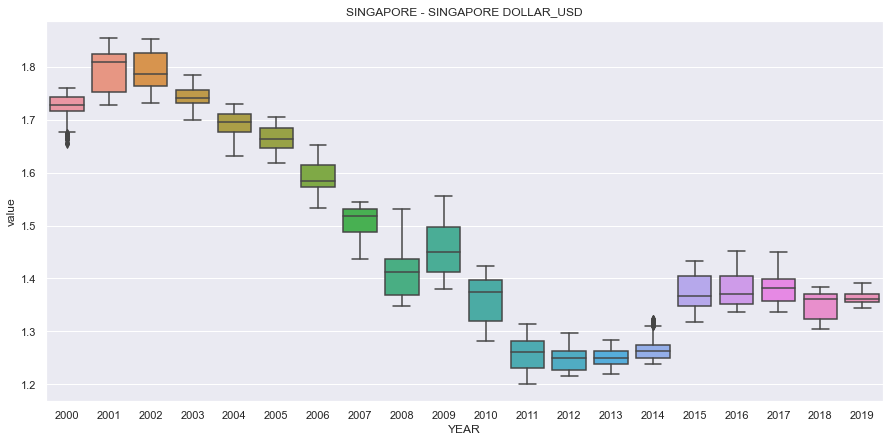

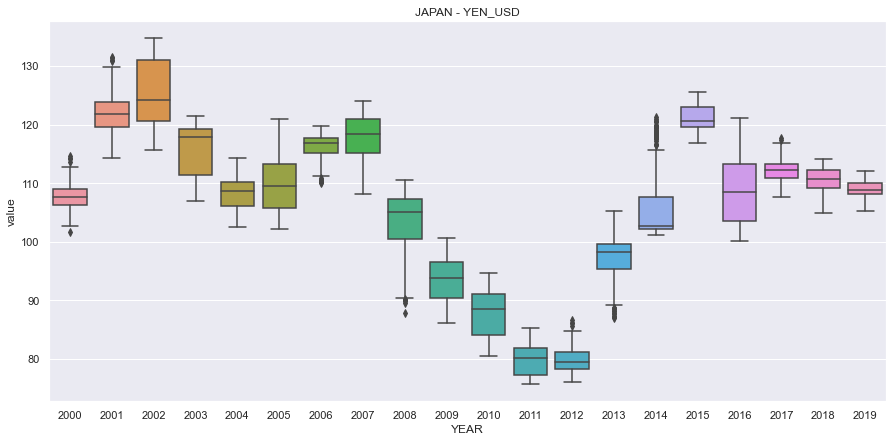

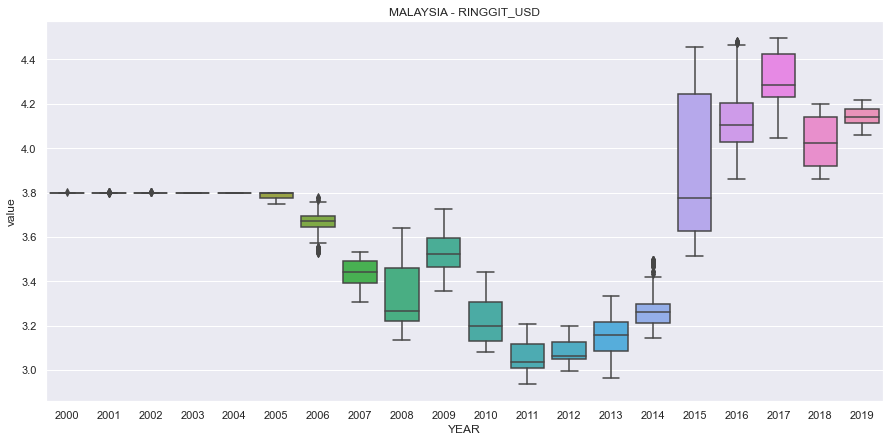

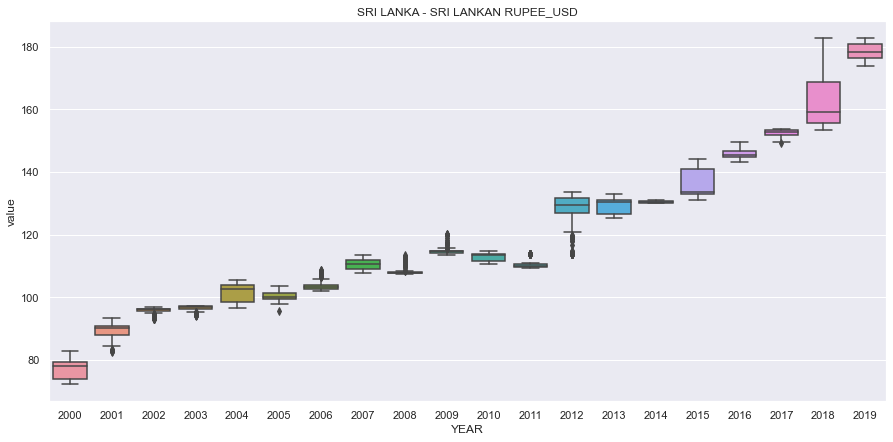

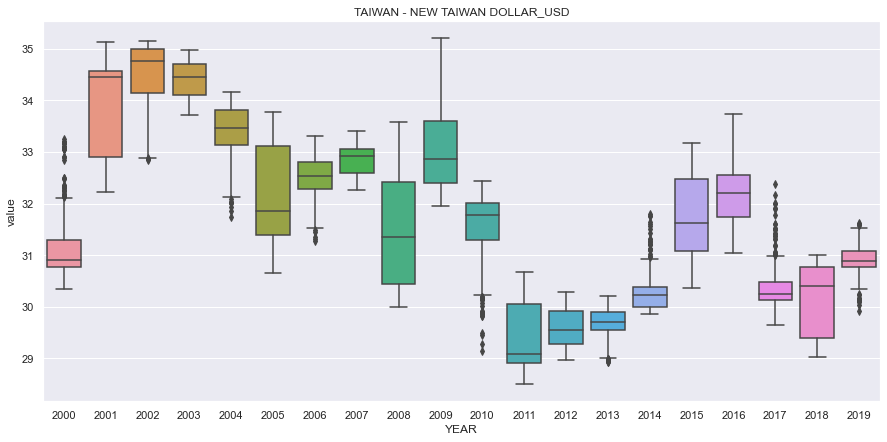

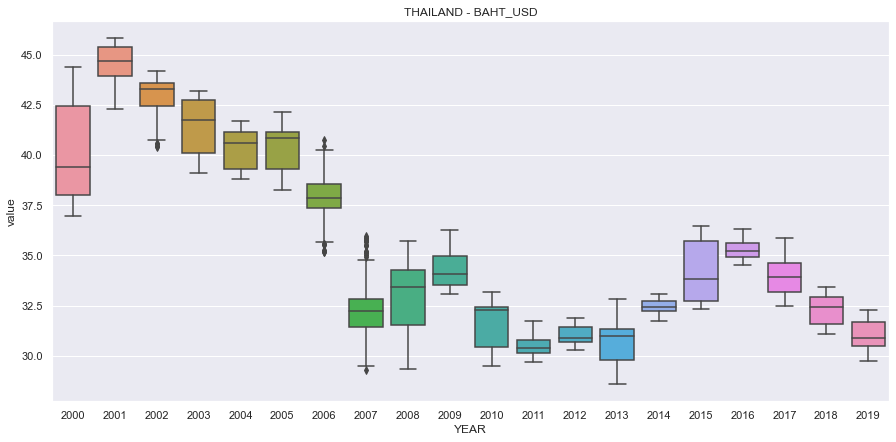

In [28]:
for column in asia.columns.tolist():
    if asia[column].dtype == float:
        plt.figure(figsize=(15,7))
        sns.boxplot(x="YEAR", y="value", data=asia_melt[asia_melt["variable"] == column]).set_title(column)

У азиатских тиграх (Япония, Тайван, Cингапур, Южная Корея) самая высокая ревальвация была 2007 и 2011 годах

# Исследование стран Северной Америки

In [29]:
north_america

,DATE,CANADA - CANADIAN DOLLAR_USD,MEXICO - MEXICAN PESO_USD,YEAR,MONTH,DAY,WEEKDAY
0,2000-01-03,1.4465,9.4015,2000,January,3,Monday
1,2000-01-04,1.4518,9.4570,2000,January,4,Tuesday
2,2000-01-05,1.4518,9.5350,2000,January,5,Wednesday
3,2000-01-06,1.4571,9.5670,2000,January,6,Thursday
4,2000-01-07,1.4505,9.5200,2000,January,7,Friday
...,...,...,...,...,...,...,...
5211,2019-12-24,1.3160,18.9550,2019,December,24,Tuesday
5213,2019-12-26,1.3124,18.9440,2019,December,26,Thursday
5214,2019-12-27,1.3073,18.8190,2019,December,27,Friday
5215,2019-12-30,1.3058,18.8630,2019,December,30,Monday


In [30]:
country_north_america = []
time_north_america = []
for column in north_america.columns.tolist():
    if north_america[column].dtype == float:
        country_north_america.append(column)
    else:
        time_north_america.append(column)
north_america_melt = pd.melt(north_america, id_vars=time_north_america, value_vars=country_north_america)
north_america_melt

,DATE,YEAR,MONTH,DAY,WEEKDAY,variable,value
0,2000-01-03,2000,January,3,Monday,CANADA - CANADIAN DOLLAR_USD,1.4465
1,2000-01-04,2000,January,4,Tuesday,CANADA - CANADIAN DOLLAR_USD,1.4518
2,2000-01-05,2000,January,5,Wednesday,CANADA - CANADIAN DOLLAR_USD,1.4518
3,2000-01-06,2000,January,6,Thursday,CANADA - CANADIAN DOLLAR_USD,1.4571
4,2000-01-07,2000,January,7,Friday,CANADA - CANADIAN DOLLAR_USD,1.4505
...,...,...,...,...,...,...,...
10025,2019-12-24,2019,December,24,Tuesday,MEXICO - MEXICAN PESO_USD,18.9550
10026,2019-12-26,2019,December,26,Thursday,MEXICO - MEXICAN PESO_USD,18.9440
10027,2019-12-27,2019,December,27,Friday,MEXICO - MEXICAN PESO_USD,18.8190
10028,2019-12-30,2019,December,30,Monday,MEXICO - MEXICAN PESO_USD,18.8630


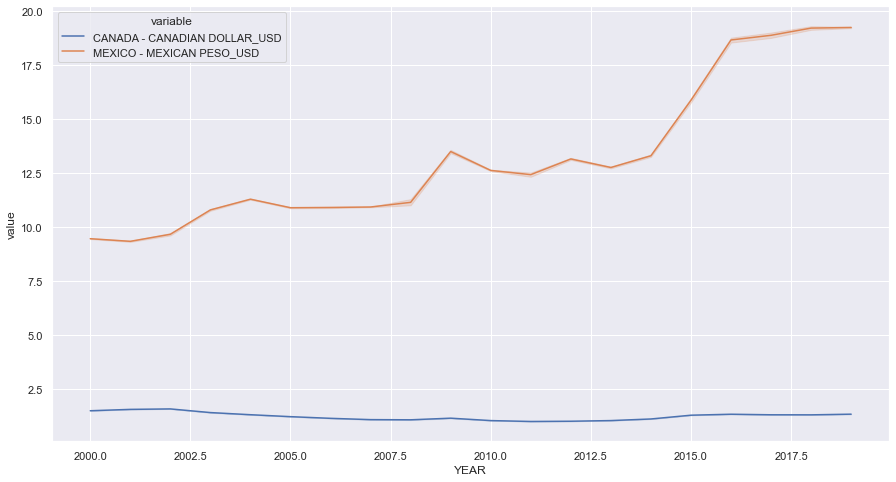

In [31]:
sns.lineplot(x="YEAR",y="value" , hue="variable", data=north_america_melt);

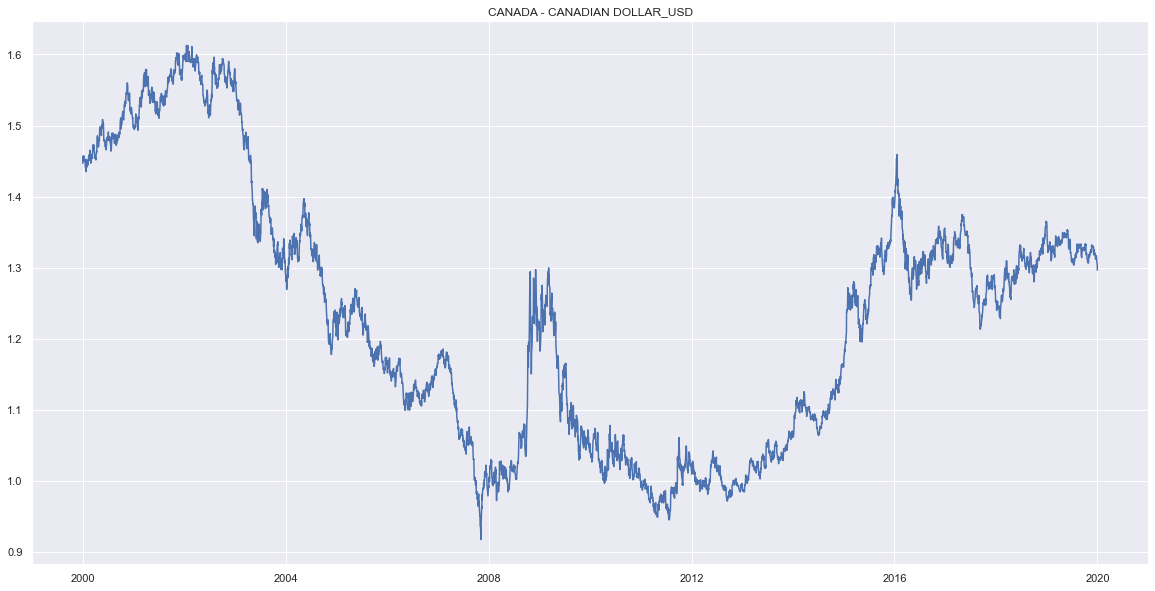

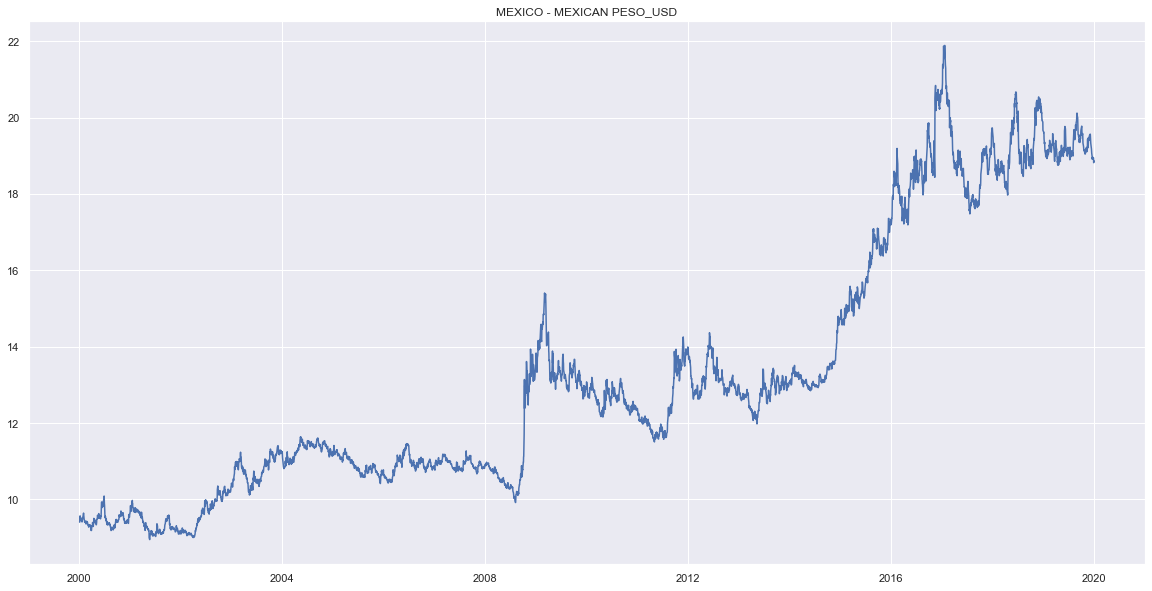

In [32]:
for column in north_america.columns.tolist():
    if north_america[column].dtype == float:
        plt.figure(figsize=(20,10))
        plt.plot(north_america["DATE"], north_america[column])
        plt.title(column)    

Здесь очевидно что национальная валюта Канады более устойчивая чем Мексиканская к доллару.

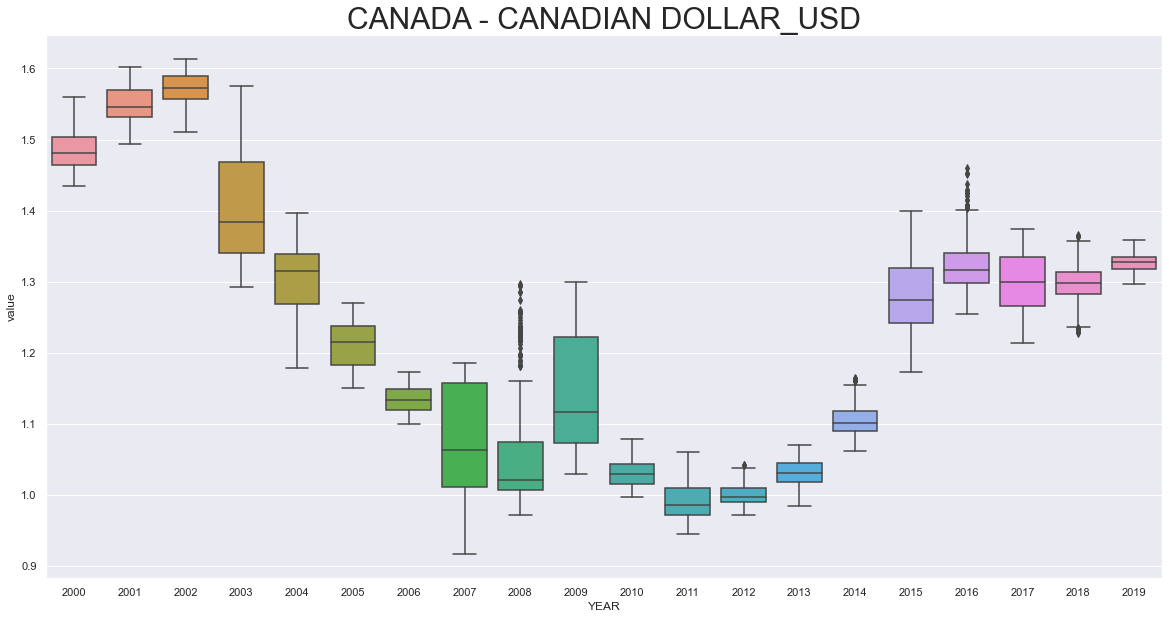

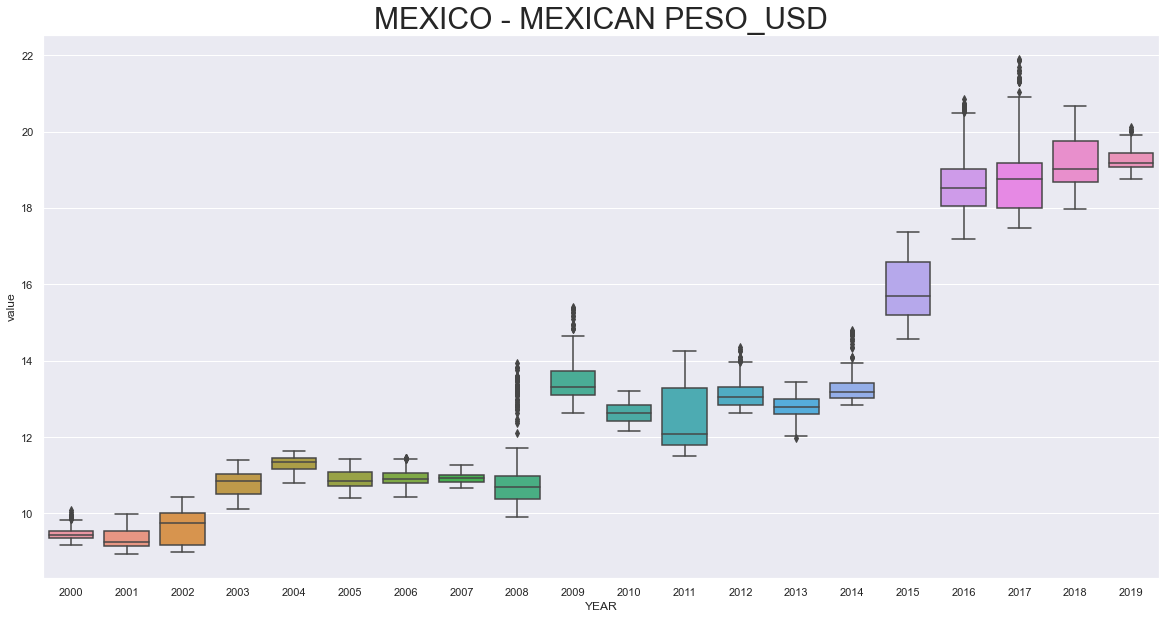

In [33]:
for column in north_america:
    if north_america[column].dtype == float:
        plt.figure(figsize=(20,10))
        g = sns.boxplot(x="YEAR", y="value", data=north_america_melt[north_america_melt["variable"]==column])
        g.set_title(column, fontsize=30)

# Исследование данных в Южной Америке 

In [34]:
south_america 

,DATE,YEAR,MONTH,DAY,WEEKDAY,BRAZIL - REAL_USD
0,2000-01-03,2000,January,3,Monday,1.8050
1,2000-01-04,2000,January,4,Tuesday,1.8405
2,2000-01-05,2000,January,5,Wednesday,1.8560
3,2000-01-06,2000,January,6,Thursday,1.8400
4,2000-01-07,2000,January,7,Friday,1.8310
...,...,...,...,...,...,...
5211,2019-12-24,2019,December,24,Tuesday,4.0833
5213,2019-12-26,2019,December,26,Thursday,4.0602
5214,2019-12-27,2019,December,27,Friday,4.0507
5215,2019-12-30,2019,December,30,Monday,4.0152


In [35]:
country_south_america = []
time_south_america = []
for column in south_america.columns.tolist():
    if south_america[column].dtype == float:
        country_south_america.append(column)
    else:
        time_south_america.append(column)
south_america_melt = pd.melt(south_america, id_vars=time_south_america, value_vars=country_south_america)
south_america_melt

,DATE,YEAR,MONTH,DAY,WEEKDAY,variable,value
0,2000-01-03,2000,January,3,Monday,BRAZIL - REAL_USD,1.8050
1,2000-01-04,2000,January,4,Tuesday,BRAZIL - REAL_USD,1.8405
2,2000-01-05,2000,January,5,Wednesday,BRAZIL - REAL_USD,1.8560
3,2000-01-06,2000,January,6,Thursday,BRAZIL - REAL_USD,1.8400
4,2000-01-07,2000,January,7,Friday,BRAZIL - REAL_USD,1.8310
...,...,...,...,...,...,...,...
5010,2019-12-24,2019,December,24,Tuesday,BRAZIL - REAL_USD,4.0833
5011,2019-12-26,2019,December,26,Thursday,BRAZIL - REAL_USD,4.0602
5012,2019-12-27,2019,December,27,Friday,BRAZIL - REAL_USD,4.0507
5013,2019-12-30,2019,December,30,Monday,BRAZIL - REAL_USD,4.0152


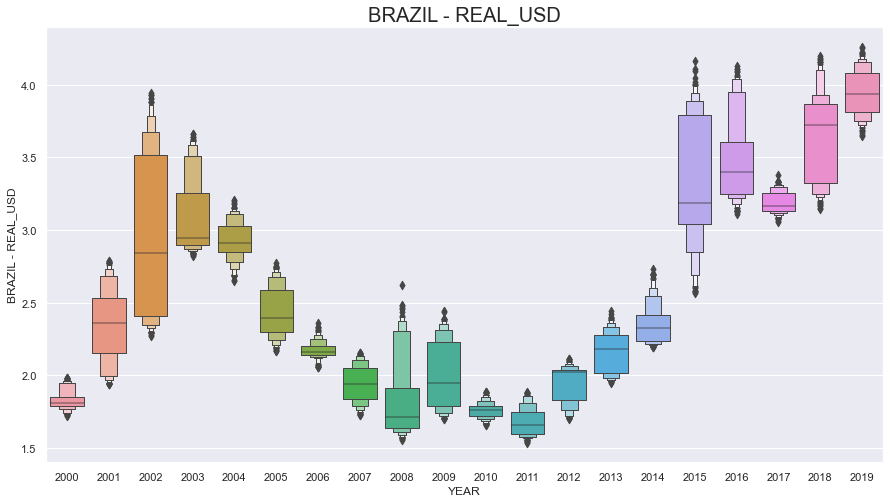

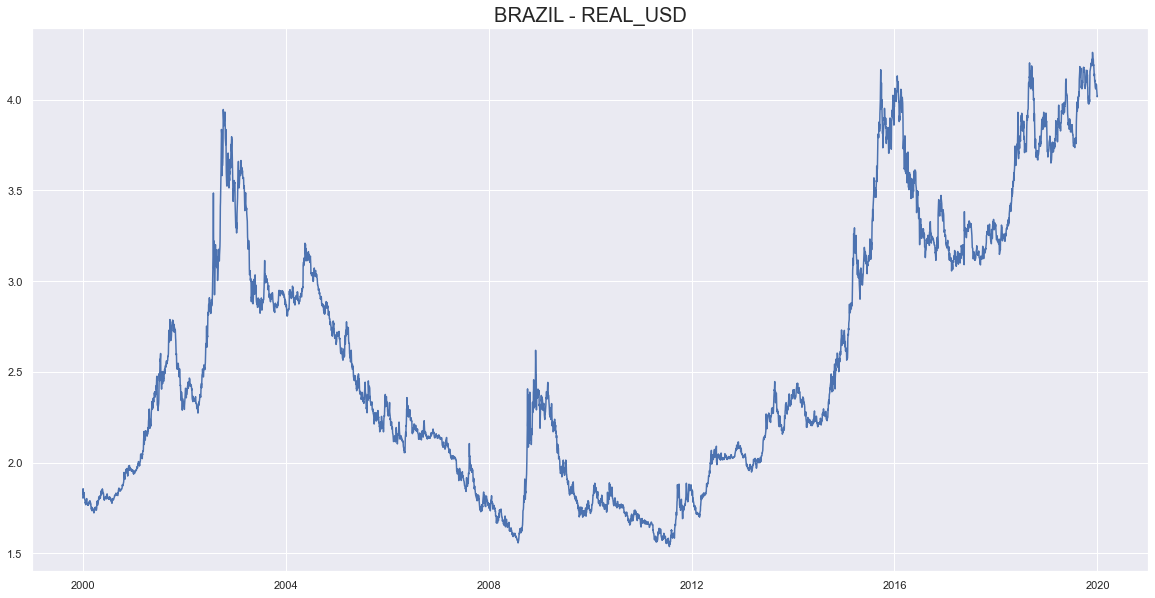

In [36]:
for column in south_america.columns.tolist():
    if south_america[column].dtype == float:
        sns.boxenplot("YEAR", column, data=south_america).set_title(column, fontsize=20)
        plt.figure(figsize=(20,10))
        plt.plot(south_america["DATE"], south_america[column])
        plt.title(column, fontsize=20)

# Исследование стран Африки

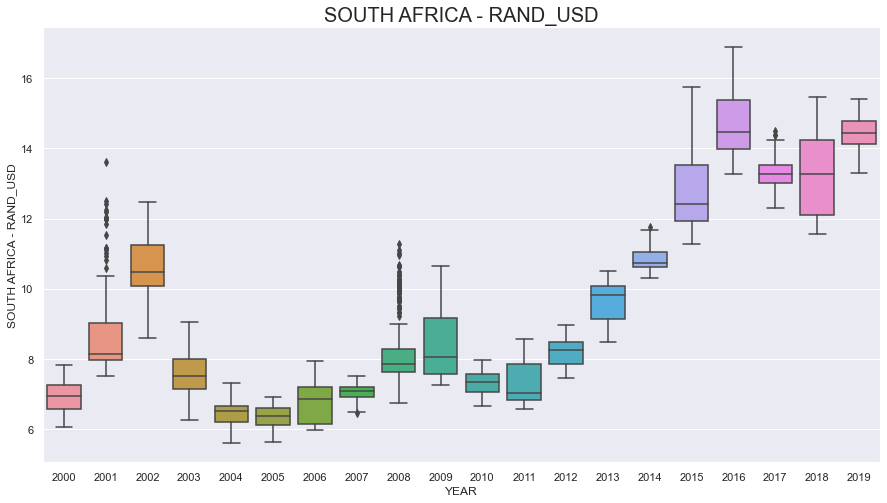

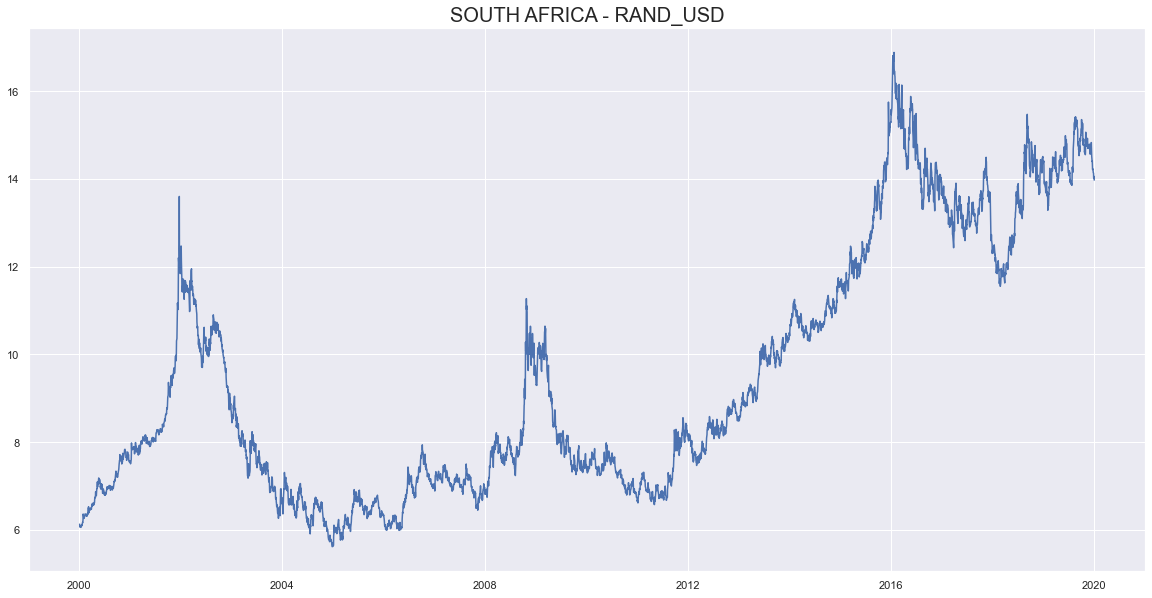

In [37]:
for column in africa.columns.tolist():
    if africa[column].dtype == float:
        sns.boxplot("YEAR", column, data=africa).set_title(column, fontsize=20)
        plt.figure(figsize=(20,10))
        plt.plot(africa["DATE"], africa[column])
        plt.title(column, fontsize=20)

In [38]:
country_oceania = []
time_oceania = []
for column in oceania.columns.tolist():
    if oceania[column].dtype == float:
        country_oceania.append(column)
    else:
        time_oceania.append(column)
oceania_melt = pd.melt(oceania, id_vars=time_oceania, value_vars=country_oceania)

In [39]:
oceania_melt

,DATE,YEAR,MONTH,DAY,WEEKDAY,variable,value
0,2000-01-03,2000,January,3,Monday,AUSTRALIA - AUSTRALIAN DOLLAR_USD,1.5172
1,2000-01-04,2000,January,4,Tuesday,AUSTRALIA - AUSTRALIAN DOLLAR_USD,1.5239
2,2000-01-05,2000,January,5,Wednesday,AUSTRALIA - AUSTRALIAN DOLLAR_USD,1.5267
3,2000-01-06,2000,January,6,Thursday,AUSTRALIA - AUSTRALIAN DOLLAR_USD,1.5291
4,2000-01-07,2000,January,7,Friday,AUSTRALIA - AUSTRALIAN DOLLAR_USD,1.5272
...,...,...,...,...,...,...,...
10025,2019-12-24,2019,December,24,Tuesday,NEW ZEALAND - NEW ZELAND DOLLAR_USD,1.5058
10026,2019-12-26,2019,December,26,Thursday,NEW ZEALAND - NEW ZELAND DOLLAR_USD,1.5002
10027,2019-12-27,2019,December,27,Friday,NEW ZEALAND - NEW ZELAND DOLLAR_USD,1.4919
10028,2019-12-30,2019,December,30,Monday,NEW ZEALAND - NEW ZELAND DOLLAR_USD,1.4846


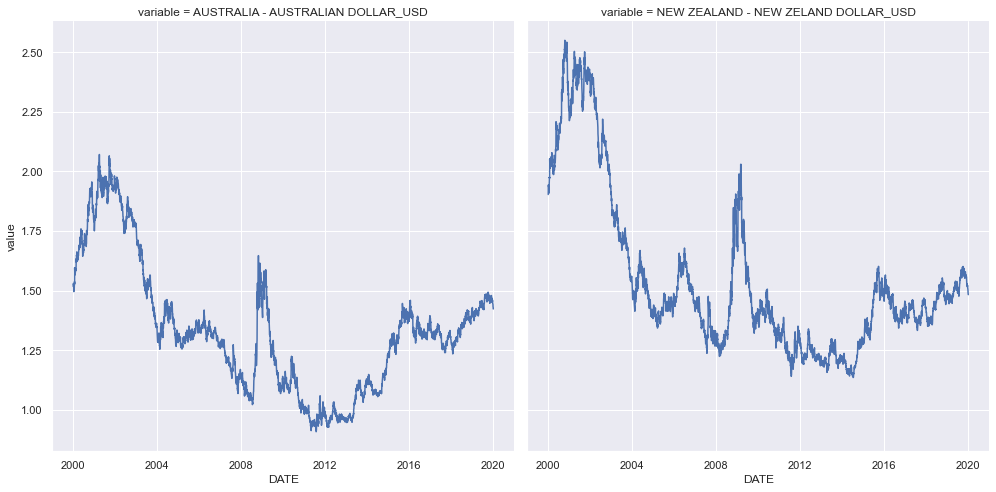

In [40]:
g = sns.FacetGrid(data=oceania_melt, col="variable", height=7)
g.map(plt.plot, "DATE","value")

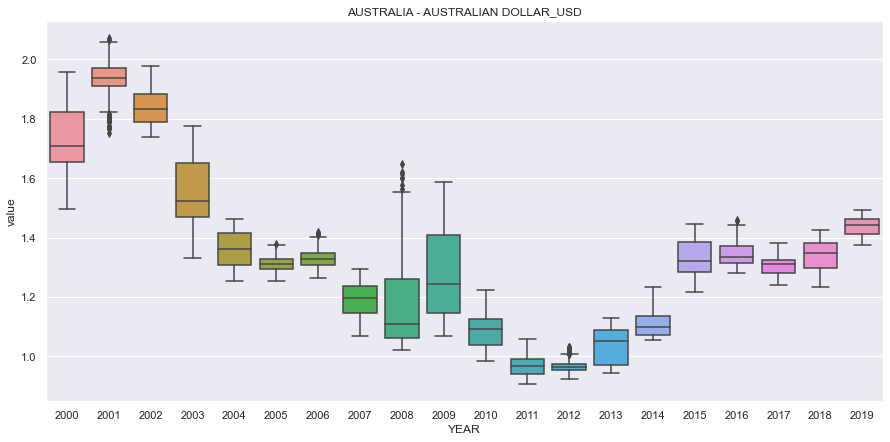

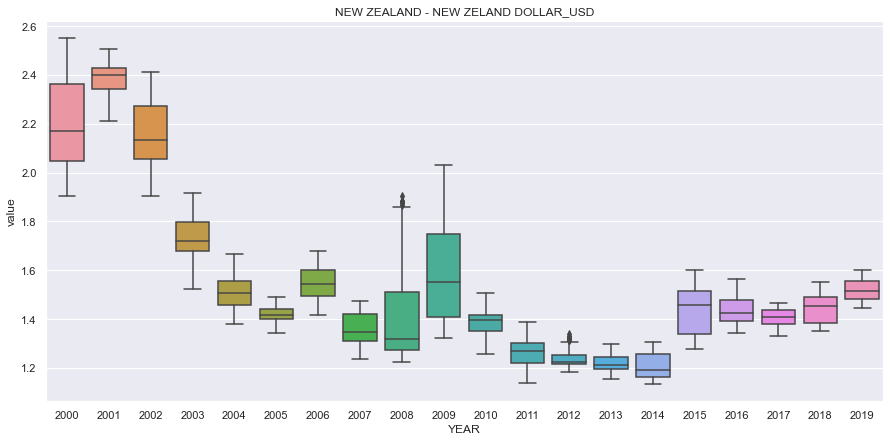

In [41]:
for column in oceania.columns.tolist(): # europa.columns.tolist() = [names of countries]
    if oceania[column].dtype == float:
        plt.figure(figsize=(15,7))
        sns.boxplot(x="YEAR", y="value", data=oceania_melt[oceania_melt["variable"] == column]).set_title(column)

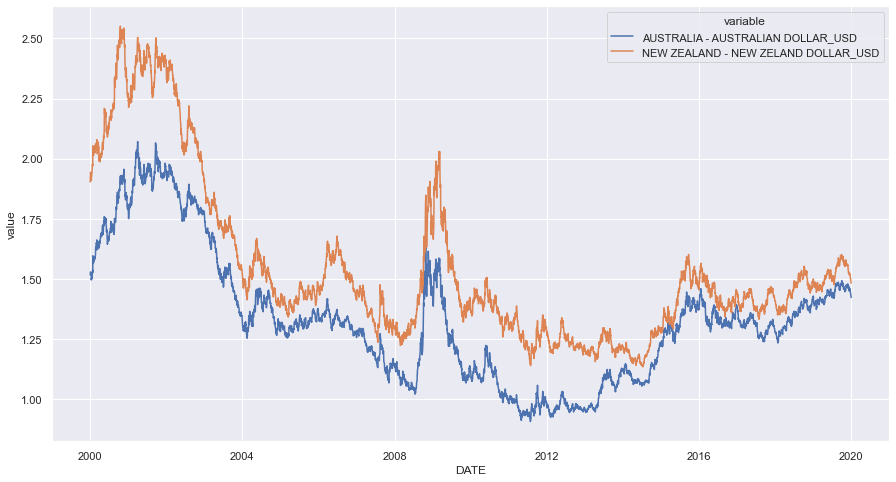

In [42]:
sns.lineplot(x="DATE",y="value" , hue="variable", data=oceania_melt);

Динамика Австралии и Новой Зеландии похоже. За 20 лет нац валюта Австралии укрепилась на 6 процентов к доллару. За это же время нац валюта
Новой Зеландии укрепилась на 20%
В Океании стабильная валюта у Новой Зеландии

In [43]:
rates

,DATE,AUSTRALIA - AUSTRALIAN DOLLAR_USD,EURO AREA - EURO_USD,NEW ZEALAND - NEW ZELAND DOLLAR_USD,UNITED KINGDOM - UNITED KINGDOM POUND_USD,BRAZIL - REAL_USD,CANADA - CANADIAN DOLLAR_USD,CHINA - YUAN_USD,HONG KONG - HONG KONG DOLLAR_USD,INDIA - INDIAN RUPEE_USD,...,NORWAY - NORWEGIAN KRONE_USD,SWEDEN - KRONA_USD,SRI LANKA - SRI LANKAN RUPEE_USD,SWITZERLAND - FRANC_USD,TAIWAN - NEW TAIWAN DOLLAR_USD,THAILAND - BAHT_USD,YEAR,MONTH,DAY,WEEKDAY
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,7.9640,8.4430,72.30,1.5808,31.38,36.97,2000,January,3,Monday
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,7.9340,8.3600,72.65,1.5565,30.60,37.13,2000,January,4,Tuesday
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,7.9350,8.3530,72.95,1.5526,30.80,37.10,2000,January,5,Wednesday
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,7.9400,8.3675,72.95,1.5540,31.75,37.62,2000,January,6,Thursday
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,7.9660,8.4150,73.15,1.5623,30.85,37.30,2000,January,7,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,2019-12-24,1.4445,0.9022,1.5058,0.7719,4.0833,1.3160,7.0064,7.7872,71.23,...,8.9142,9.4133,181.30,0.9807,30.14,30.15,2019,December,24,Tuesday
5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,71.28,...,8.8799,9.4108,181.30,0.9808,30.11,30.15,2019,December,26,Thursday
5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,...,8.8291,9.3405,181.35,0.9741,30.09,30.14,2019,December,27,Friday
5215,2019-12-30,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,71.30,...,8.7839,9.3145,181.60,0.9677,30.04,29.94,2019,December,30,Monday


In [44]:
rates_country = []
rates_time = []
for column in rates.columns.tolist():
    if rates[column].dtype == float:
        rates_country.append(column)
    else:
        rates_time.append(column)
rates_melt = pd.melt(rates, id_vars=rates_time, value_vars=rates_country)

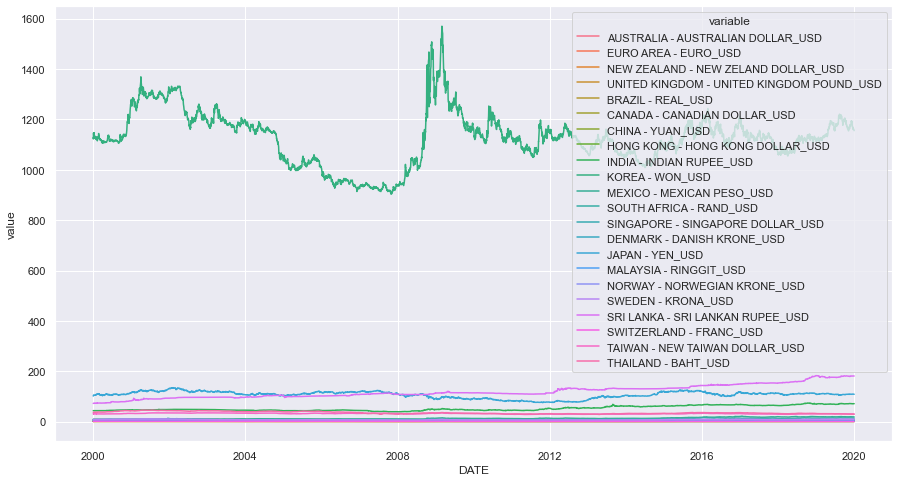

In [45]:
sns.lineplot(x="DATE", y="value", hue="variable", data=rates_melt);

1.В Европе надежная валюта Швейцарсаркии франк

2.В Азии Таиландскии бат

3.В Севернои Америки Канадскии доллар

4.В Океании Новозеландскии доллар